In [56]:
# IMPORTANT: If you have no permission to read the files, write the following command

# sudo chown <user>:<group>           (<group> is usually 'staff', without '')

# and drag all files (or the containing folder) into the terminal, then execute the command

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# setup (adapt if necessary)

path_log = '/Users/max/Desktop/log/'
path_acc = '/Users/max/Desktop/accuracies/'

n_img = 9834
n_epochsA = 20
n_epochsB = 10
n_itersA = n_epochsA*n_img
n_itersB = n_epochsB*n_img

In [76]:
# grid

lambda_s = ['1', '5e-1', '1e-1', '5e-2', '1e-2', '5e-3', '1e-3', '5e-4']
lambda_n = np.array(lambda_s).astype(float)

metric_s = ['2', 'cos']

lr_s = ['1e-3', '1e-4', '1e-5', '1e-6']
lr_n = np.array(lr_s).astype(float)

epoch_n = np.arange(n_epochsB)+1
epoch_s = list(epoch_n.astype(str))

In [14]:
# load accuracy values & write adversarial loss values into array

ACC = -np.ones(shape=(len(lambda_s), len(metric_s), len(lr_s), len(epoch_s)))
adv_loss = -np.ones(shape=(len(lambda_s), len(metric_s), len(lr_s), len(epoch_s)))

for i, la in enumerate(lambda_s):
    for j, me in enumerate(metric_s):
        for k, lr in enumerate(lr_s):
            
            hyper_name = la+'_'+me+'_'+lr
            file = open(path_acc+hyper_name+'_accuracies.txt', 'r')
            ACC[i,j,k,:] = file.read().split('\n')
            file.close()
            
            with open(os.path.join(path_log, hyper_name+'.txt'), 'r') as f:
        
                lines = f.readlines()

                for line in lines:

                    if 'work_dir' in line:
                        stem = '_'.join(line.split('/')[5].split('_')[:3])

                    elif '][INFO] Iter' in line:

                        for n_ep in range(n_epochs):

                            str_ep = str(round((n_ep+1)*n_img/10)*10)

                            if (str_ep+'/'+str(n_itersA) in line) or (str_ep+'/'+str(n_itersB) in line):
                                idx_loss = line.find('g_loss: ')
                                adv_loss[i,j,k,n_ep] = float(line[idx_loss+8:idx_loss+13])

In [ ]:
# adv_loss seems not to help to detect nonsense images...
for i in enumerate(lambda_s):
    for j in enumerate(metric_s):
        for k in enumerate(lr_s):
            plt.plot(np.arange(n_epochsB)+1, adv_loss[i,j,k,:])
            
plt.show()

In [49]:
# ONLY FOR TESTING - DON'T EXECUTE

ACC = np.random.rand(len(lambda_s), len(metric_s), len(lr_s), len(epoch_s))

In [55]:
# find optimum

opt_idx = np.unravel_index(np.argmin(ACC, axis=None), ACC.shape)
opt_acc = ACC[opt_idx]

print('opt ac =', str(opt_acc))
print('opt la =', lambda_s[opt_idx[0]])
print('opt me =', metric_s[opt_idx[1]])
print('opt lr =', lr_s[opt_idx[2]])
print('opt ep =', epoch_s[opt_idx[3]])

opt ac = 0.00039292709816607374
opt la = 5e-3
opt me = cos
opt lr = 1e-4
opt ep = 9


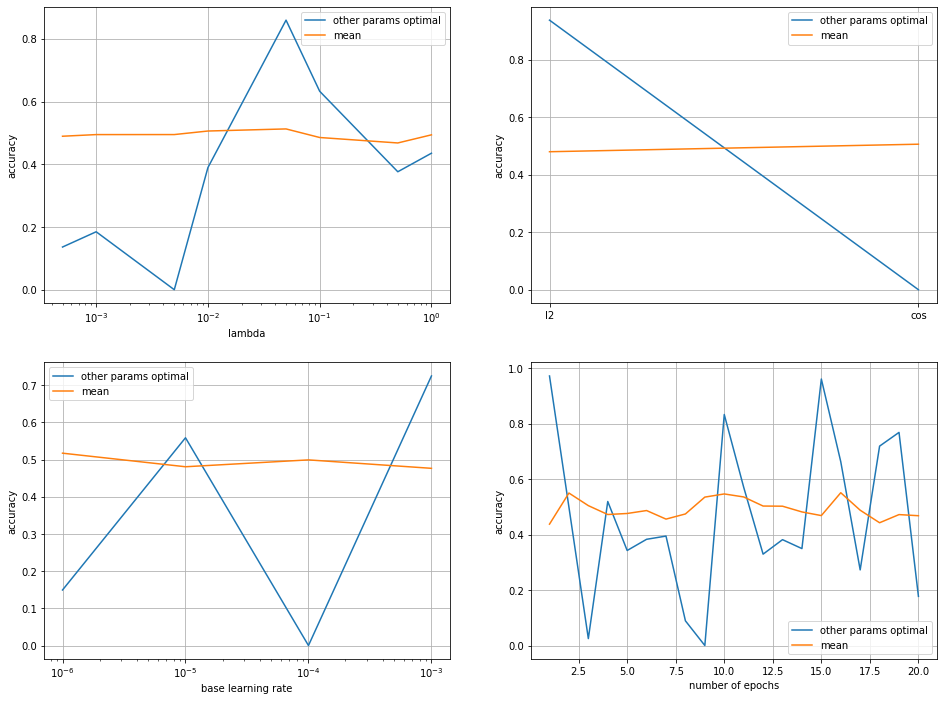

In [101]:
# plots

f = plt.figure(figsize=(16,12))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

# ac over la
ax1.semilogx(lambda_n, ACC[:,opt_idx[1],opt_idx[2],opt_idx[3]])
ax1.semilogx(lambda_n, np.mean(ACC, axis=(1,2,3)))
ax1.set_xlabel('lambda')
ax1.set_ylabel('accuracy')
ax1.legend(['other params optimal','mean'])
ax1.grid()

# ac over me
ax2.plot([0, 1], ACC[opt_idx[0],:,opt_idx[2],opt_idx[3]])
ax2.plot([0, 1], np.mean(ACC, axis=(0,2,3)))
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['l2', 'cos'])
ax2.set_ylabel('accuracy')
ax2.legend(['other params optimal','mean'])
ax2.grid()

# ac over lr
ax3.semilogx(lr_n, ACC[opt_idx[0],opt_idx[1],:,opt_idx[3]])
ax3.semilogx(lr_n, np.mean(ACC, axis=(0,1,3)))
ax3.set_xlabel('base learning rate')
ax3.set_ylabel('accuracy')
ax3.legend(['other params optimal','mean'])
ax3.grid()

# ac over ep
ax4.plot(epoch_n, ACC[opt_idx[0],opt_idx[1],opt_idx[2],:])
ax4.plot(epoch_n, np.mean(ACC, axis=(0,1,2)))
ax4.set_xlabel('number of epochs')
ax4.set_ylabel('accuracy')
ax4.legend(['other params optimal','mean'])
ax4.grid()